In [45]:
library(ggplot2)
library(RColorBrewer)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [26]:
ordination_tab <- read.delim("ordination_mod.txt", h=FALSE)
metadata <- read.delim("metadata.tsv", h=TRUE)

In [27]:
proportion_explained <- ordination_tab[1,]
ordination_tab <- ordination_tab[-1,]
pcoa_dims <- data.frame(SampleID = ordination_tab[,1],
                        Dim1 = ordination_tab[,2],
                        Dim2 = ordination_tab[,3],
                        Dim3 = ordination_tab[,4])

In [34]:
metadata
pcoa_dims

SampleID,Group
<fct>,<fct>
STZ-Akk-2,Diabetes_Akkermansia
STZ-Akk-3,Diabetes_Akkermansia
STZ-Akk-4,Diabetes_Akkermansia
STZ-Akk-6,Diabetes_Akkermansia
STZ-Akk-7,Diabetes_Akkermansia
STZ-PBS-1,Diabetes
STZ-PBS-2,Diabetes
STZ-PBS-3,Diabetes
STZ-PBS-4,Diabetes


SampleID,Dim1,Dim2,Dim3
<fct>,<dbl>,<dbl>,<dbl>
STZ-Akk-2,-0.05470261,-0.250785713,-0.011366349
STZ-Akk-3,0.01458713,-0.123952654,0.112057108
STZ-Akk-4,-0.04741118,-0.088847642,0.144549040
STZ-Akk-6,-0.08821106,-0.099814985,0.161795131
STZ-Akk-7,-0.07356301,-0.068325402,-0.004311677
STZ-PBS-1,-0.07868111,0.239431827,0.006935682
STZ-PBS-2,0.07664745,-0.069019370,-0.161776563
STZ-PBS-3,-0.26353574,0.064981640,-0.064672028
STZ-PBS-4,0.01027206,-0.019215063,0.002327985


In [38]:
pcoa_meta <- merge(metadata, pcoa_dims, by.x="SampleID", by.y="SampleID")


SampleID,Group,Dim1,Dim2,Dim3
<fct>,<fct>,<dbl>,<dbl>,<dbl>
STZ-Akk-2,Diabetes_Akkermansia,-0.05470261,-0.250785713,-0.011366349
STZ-Akk-3,Diabetes_Akkermansia,0.01458713,-0.123952654,0.112057108
STZ-Akk-4,Diabetes_Akkermansia,-0.04741118,-0.088847642,0.144549040
STZ-Akk-6,Diabetes_Akkermansia,-0.08821106,-0.099814985,0.161795131
STZ-Akk-7,Diabetes_Akkermansia,-0.07356301,-0.068325402,-0.004311677
STZ-PBS-1,Diabetes,-0.07868111,0.239431827,0.006935682
STZ-PBS-2,Diabetes,0.07664745,-0.069019370,-0.161776563
STZ-PBS-3,Diabetes,-0.26353574,0.064981640,-0.064672028
STZ-PBS-4,Diabetes,0.01027206,-0.019215063,0.002327985


In [39]:
Group <- c("Diabetes_Akkermansia", "Diabetes", "No_Diabetes")

pcoa_meta$Group <- factor(pcoa_meta$Group,
                   levels = Group, ordered = TRUE)

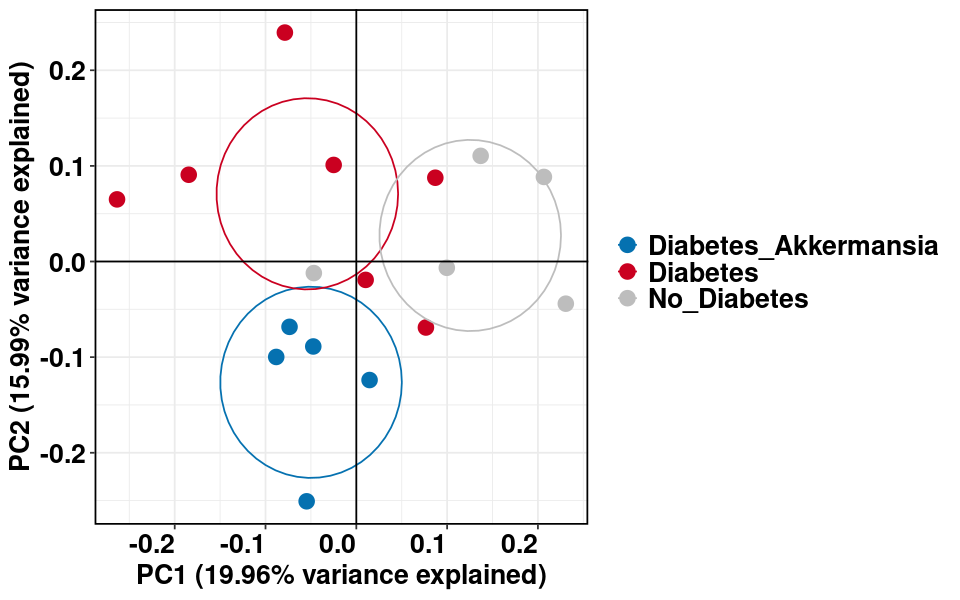

In [53]:
options(repr.plot.width=8, repr.plot.height=5)

clustid <- pcoa_meta$Group 
my_palette <- c("#0571b0", "#ca0020", "#bdbdbd")


p <- ggplot(pcoa_meta, aes(Dim1, Dim2, color=factor(clustid)))
        p <- p + 
        geom_point(size = 4) + 
        #stat_ellipse() +
        stat_ellipse(type = "", level = 0.1) +
        scale_color_manual(values = my_palette) +
        geom_hline(yintercept=0) +
        geom_vline(xintercept=0) +
        labs(x ="PC1 (19.96% variance explained)", 
             y = "PC2 (15.99% variance explained)") +
        theme_bw() + guides(fill=guide_legend(ncol=1))  +
        theme(axis.text.x = element_text(hjust = 1, size = 16, colour = "black", face="bold"),
              axis.text.y = element_text(hjust = 1, size = 16, colour = "black", face="bold"),
              axis.text = element_text(size = 16, colour = "black", face="bold"),
              axis.title = element_text(size = 16, colour = "black", face="bold"),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              legend.title=element_blank(),
              legend.text=element_text(size=16, colour = "black", face="bold"),
              legend.key.width = unit(0.5,"cm"), legend.key.height = unit(0.5,"cm"))

print(p)

In [28]:
proportion_explained


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Proportion explained,0.1996045,0.159917,0.1461655,0.09554591,0.08819661,0.06413382,0.05251778,0.04499111,0.04024417,0.03563374,0.0231595,0.02279586,0.01380139,0.009136595,0.00415648,0,0
